# Лабораторная работа №8
## по предмету Компьютерная геометрия и геометрическое моделирование
- Студент Ф.И.О: **Яссин Мохамад Аламин**.
- Студ Ноиер: **1032205004**.
- Группа: **НКНбд-01-20**.


***Задание №1***
- Написать функцию, которая вычисляет значения полинома Бернштейна 𝐵𝑖 𝑛(𝑡) для заданных параметров 𝑖, 𝑛 и 𝑡. Сколько полиномов существует при 𝑛 = 1, 2, 3, 4, 5, 6? Постройте их графики и сверьте с картинками из презентации.

In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import math
import functools
import os
import subprocess

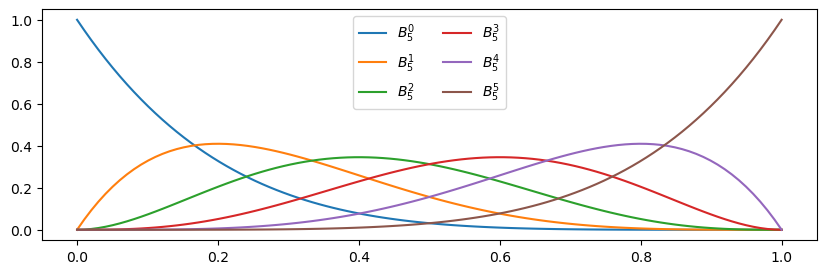

In [2]:
@functools.lru_cache
def C(n, i):
    """Число сочетаний из n по k"""
    return math.comb(n, i)

def Bezier_curve(t, p):
    n = len(p)
    res = []
    for _t in t:
        b_curve = np.zeros_like(p[0])
        for i in range(0, n, 1):
            b_curve += Bern_pol(i=i, n=n-1, t=_t)*p[i]
        res.append(b_curve)
    return np.array(res)

def Bern_pol(i, n, t):
    return C(n=n, i=i) * (1 - t)**(n - i) * (t**i)

P = [(1, 1), (5, 3), (1, 3), (2, 2)]
P = np.array(P, dtype=np.float64)
T = np.linspace(0, 1, 100)

fig01 = plt.figure(1, figsize=(10, 3))
ax01 = fig01.add_subplot(1,1,1)

n = 5
for i in range(n+1):
    ax01.plot(T, Bern_pol(i, n, T), markersize=6, markevery=10, label=f'$B^{{{i}}}_{{{n}}}$')

ax01.legend(ncol=2)

***Задание №2***
- Напишите программу, которая вычисляет точки кривой Безье любого порядка с помощью полиномов Бернштейна. Порядок кривой должен вычисляться автоматически на основе количества точек, которые используются для построения. Сверьте результаты работы программы с таблицей 5 и с ри- сунком 19. Координаты точек: (1, 1), (2, 2), (4, 2), (5, 1), (2, 0), (1, 1).

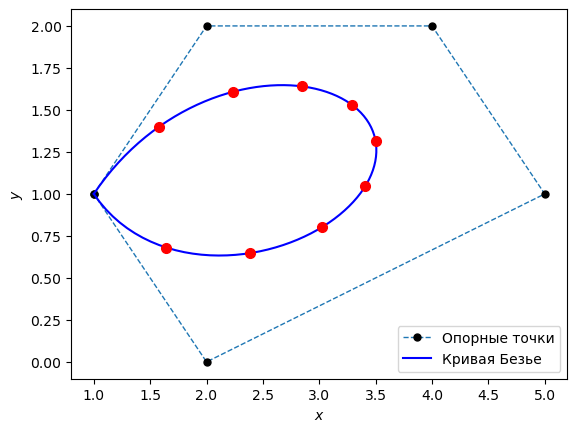

In [3]:
T_1 = np.linspace(0.1, 0.9, 9)
P = [(1, 1), (2, 2), (4, 2), (5, 1), (2, 0), (1, 1)]
P = np.array(P, dtype=np.float64)
Bezier_curve(T_1, P)
fig = plt.figure(0)
ax = fig.add_subplot(1, 1, 1)
ax.plot(*zip(*P),
        markersize=5,
        marker='o',
        lw=1.0,
        markeredgecolor='k',
        markerfacecolor='k',
        ls='--',
        label='Опорные точки')
ax.plot(*Bezier_curve(T, P).T, label='Кривая Безье', color='blue')
ax.plot(*Bezier_curve(T_1, P).T,
        linestyle='',
        marker='o',
        mfc='red',
        mec='red',
        ms=7)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.legend(loc='best')

***Задание №3***
- Для кривых 𝐵(2, 𝑡), 𝐵(3, 𝑡), 𝐵(4, 𝑡) используйте матричные формулы. Сравните быстродействие универсальной функции из задания №2 с матричным вариантом (естественно для 𝑛 = 2, 3, 4).

In [4]:

def B2(t, p):
    t_matrix = np.vstack([t**2, t, np.ones(len(t))]).T
    c_matrix = np.array([
         [1, -2, 1],
        [-2, 2, 0],
        [1, 0, 0]
    ])
    A = np.dot(t_matrix, c_matrix)
    return  np.dot(A, p)

def B3(t, p):
    t_matrix = np.vstack([t**3, t**2, t, np.ones(len(t))]).T
    c_matrix = np.array([
        [-1, 3, -3, 1],
        [3, -6, 3, 0],
        [-3, 3, 0, 0],
        [0, 0, 0, 0]
    ])
    A = np.dot(t_matrix, c_matrix)
    return  np.dot(A, p)

def B4(t, p):
    t_matrix = np.vstack([ t**4, t**3, t**2, t, np.ones(len(t))]).T
    c_matrix = np.array([
       [-1, -4, 6, -4, 1],
        [-4, 12, -12, 4, 0],
        [6, -12, 6, 0, 0],
        [-4, -4, 0, 0, 0],
        [1, 0, 0, 0, 0]
    ])
    A = np.dot(t_matrix, c_matrix)
    return  np.dot(A, p)

Сравнение для кривых Безье второго порядка

In [5]:
T = np.linspace(0, 1, 100)
P = np.array([(1, 1, 1), (5, 3, 1), (1, 3, 1)], dtype=np.float64)
%timeit B2(T, P).T

18.6 µs ± 127 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [6]:
%timeit Bezier_curve(T, P).T

1.32 ms ± 11.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Сравнение для кривых Безье третьего порядка

In [7]:
P = np.array([(1, 1, 1), (5, 3, 1), (1, 3, 1), (2, 2, 1)], dtype=np.float64)
%timeit B3(T, P).T

31.5 µs ± 608 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [8]:
%timeit Bezier_curve(T, P).T

1.59 ms ± 53.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Сравнение для кривых Безье 4 порядка

In [9]:
P = np.array([(1, 1, 1), (5, 3, 1), (1, 3, 1), (2, 2, 1), (4, 3, 1)], dtype=np.float64)
%timeit B4(T, P).T

33.6 µs ± 665 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [10]:
%timeit Bezier_curve(T, P).T

1.82 ms ± 6.75 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


***Задание №4***
- Реализуйте построение кривой Безье по алгоритму де Кастельжо. Нарисуйте опорные ломанные, точки на которых вычисляет алгоритм де Кастельжо.

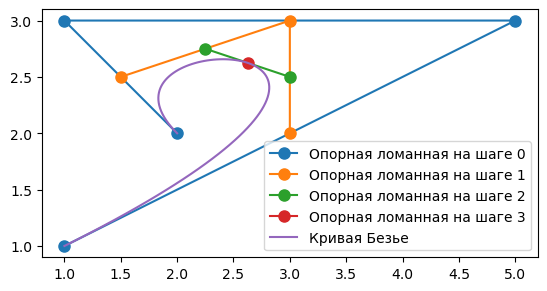

In [11]:
def De_Casteljau(t, P):
    N = len(P)
    interm_results = []
    interm_results.append(P)
    for step in range(0, N, 1):
        points = []
        current_points = interm_results[step]
        for i in range(0, len(current_points)-1, 1):
            new_point = (1-t) * current_points[i] + t * current_points[i+1]
            points.append(new_point)
        interm_results.append(points)
    return interm_results

def De_Casteljau_point(t, P):
    N = len(P)
    current_points = P
    for step in range(0, N - 1, 1):
        points = []
        for i in range(0, len(current_points) - 1, 1):
            new_point = (1 - t) * current_points[i] + t * current_points[i + 1]
            if (step == N - 2):
                return new_point
            points.append(new_point)
        current_points = points

points = [(1, 1), (5, 3), (1, 3), (2, 2)]
points = np.array(points, dtype=np.float64)
T = np.linspace(0, 1, 100)
dcr = De_Casteljau(0.5, points)
dcr_points = np.array([De_Casteljau_point(t, points) for t in T]).T

fig = plt.figure(5)
ax = fig.add_subplot(1, 1, 1)

step = 0
for interm_points in dcr:
    _p = np.array(interm_points).T
    ax.plot(*_p,
            marker='o',
            ms=8,
            label='Опорная ломанная на шаге {}'.format(step))
    step += 1

ax.plot(*dcr_points, label='Кривая Безье')
ax.legend(loc='best')
ax.set_aspect('equal')

***Задание №5***
- Сделаете анимацию движения опорных ломанных из алгоритма де Кастельжо.

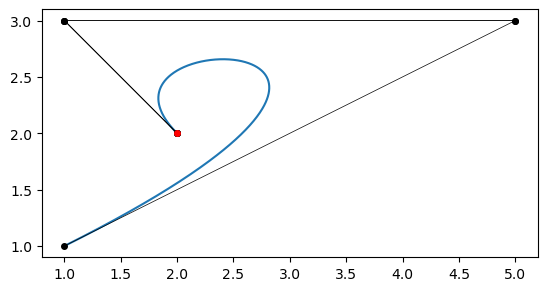

In [12]:
points = [(1, 1), (5, 3), (1, 3), (2, 2)]
points = np.array(points, dtype=np.float64)

FOLDER = 'animation_frames'
try:
    os.mkdir(FOLDER)
except FileExistsError:
    pass

fig = plt.figure(5)
ax = fig.add_subplot(1, 1, 1)
ax.set_aspect('equal')
frames = 600
T = np.linspace(0, 1, frames)
dcr_points = np.array([De_Casteljau_point(t, points) for t in T]).T
counter = 0
for i in T:
    ax.clear()
    dcr = De_Casteljau(i, points)
    final_points_X = dcr_points[0][0:counter + 1]
    final_points_Y = dcr_points[1][0:counter + 1]

    ax.plot(final_points_X, final_points_Y)

    for interm_points in dcr:
        _p = np.array(interm_points).T
        ax.plot(*_p, marker='o', ms=4, color='black', lw=0.5)

    if (counter != 0):
        ax.plot(final_points_X[counter],
                final_points_Y[counter],
                ls='',
                marker='o',
                ms=4,
                mfc='red',
                mec='red')
    fig.savefig('{0}/{1:03d}.png'.format(FOLDER, counter),
                dpi=300,
                format='png')
    counter += 1

In [13]:
from PIL import Image
frame_folder = './animation_frames'
frame_files = sorted([f for f in os.listdir(frame_folder) if f.endswith('.png')])
frames = []

for file_name in frame_files:
    image = Image.open(os.path.join(frame_folder, file_name))
    frames.append(image)

output_gif = 'output.gif'
frame_duration = 100
frames[0].save(output_gif, save_all=True, append_images=frames[1:], duration=frame_duration, loop=0)

[gif](http://localhost:8888/edit/output.gif)